# Exploring Mental Health raw data EDA 

In [5]:
import pandas as pd 
import numpy as np 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Overview

class is the binary target (either e or p)

In [ ]:
train_path = "../data/raw/train.csv"
test_path = "../data/raw/test.csv"

train = pd.read_csv(train_path, index_col = "id")
test = pd.read_csv(test_path, index_col = "id")

print(f"Train shape: {train.shape}, Test shape: {test.shape}")
train.head()

Train shape: (140700, 19), Test shape: (93800, 18)


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [8]:
train.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Missing Values 

In [9]:
train.isnull().sum()

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

There are missing values in **Work Pressure**, **Job Satisfaction** and **Profession** mainly because **Student** doesn't have a job. The same issue for **Academic Pressure**, **CGPA** and **Study Satisfaction** for the **Working professional**. The other missing values are negligeable so will be dropped.

## Distribution

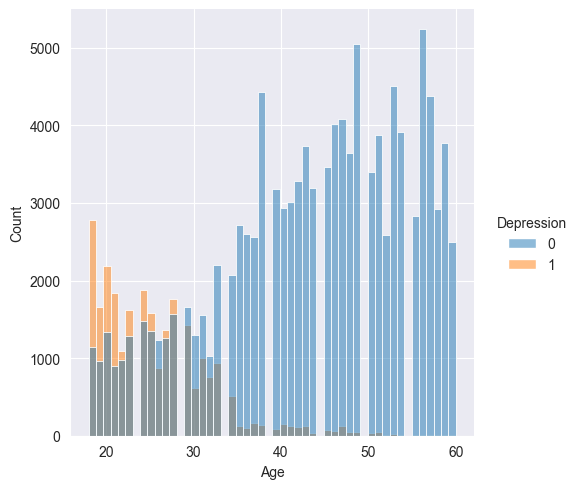

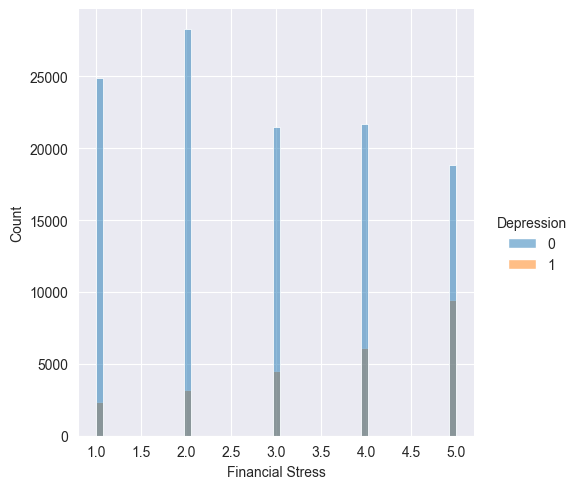

In [ ]:
sns.set_style('darkgrid')

sns.displot(train, x="Age", hue="Depression")
sns.displot(train, x="Financial Stress", hue="Depression")

The histograms show that most of the depressed people have less than 35 years old approximately and more a person has financial stress more likely it is depressed

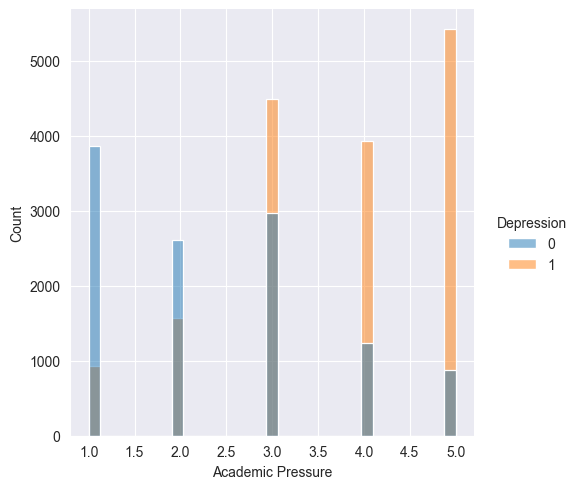

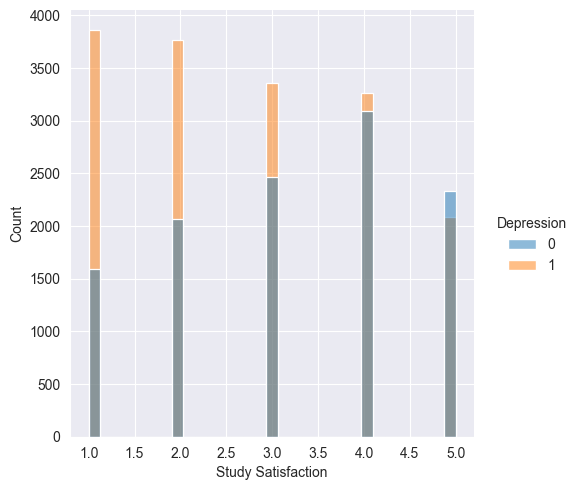

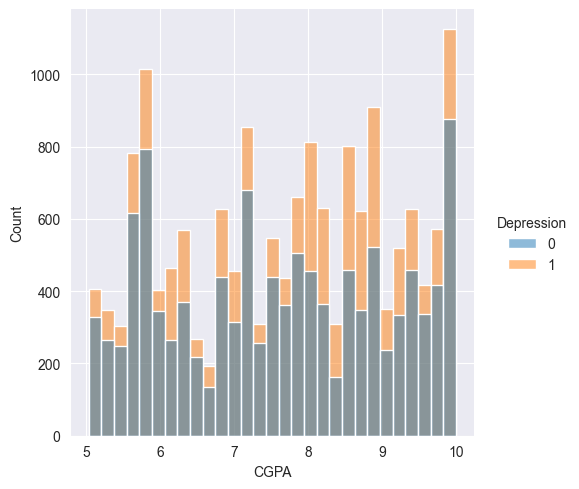

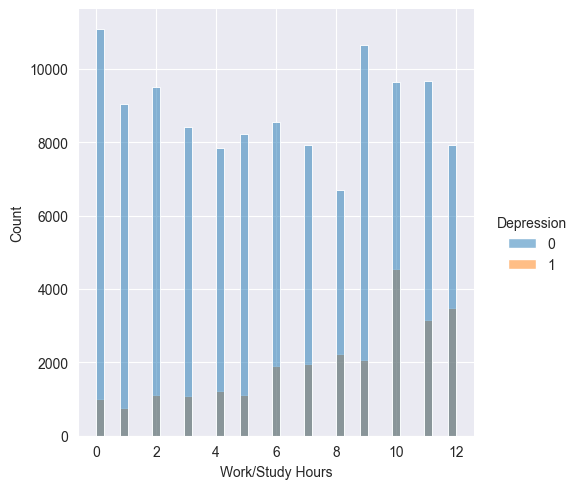

In [ ]:
sns.displot(train, x="Academic Pressure", hue="Depression")
sns.displot(train, x="Study Satisfaction", hue="Depression")
sns.displot(train, x="CGPA", hue="Depression")
sns.displot(train, x="Work/Study Hours", hue="Depression")

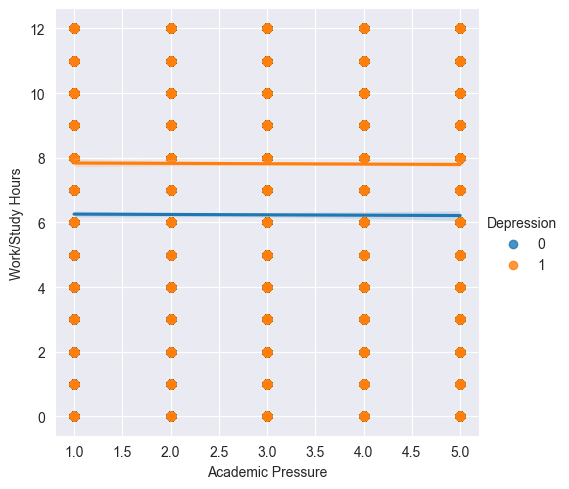

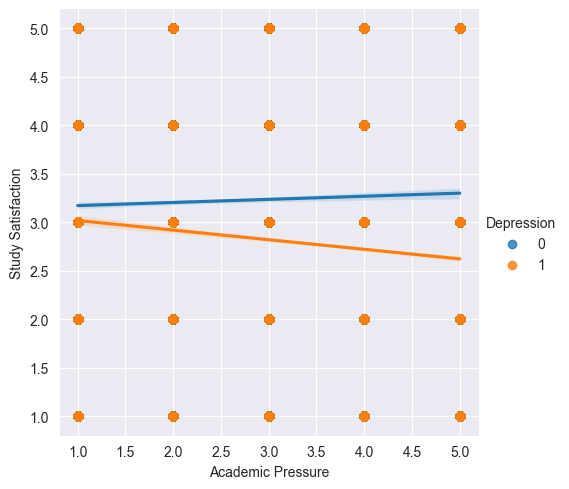

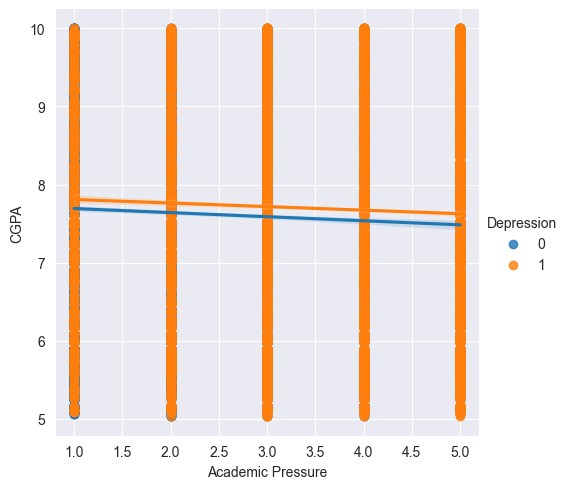

In [46]:
sns.lmplot(train, x="Academic Pressure", y="Work/Study Hours", hue="Depression")
sns.lmplot(train, x="Academic Pressure", y="Study Satisfaction", hue="Depression")
sns.lmplot(train, x="Academic Pressure", y="CGPA", hue="Depression")

We observe that **Academic Pressure** and **Study Satisfaction** have a great influence on **Depression**. We can guess that a **Student** who is not satisfied with his study is more likely to have academic pressure and this leads to depression. About **CGPA**, it is harder to see a clear tendency from the distribution plot but from the scatter plot we observe that the **Academic Pressure** is higher when **CGPA** decrease. Finally, the depression rate increase slowly when a person's **Work/Study Hours** increase

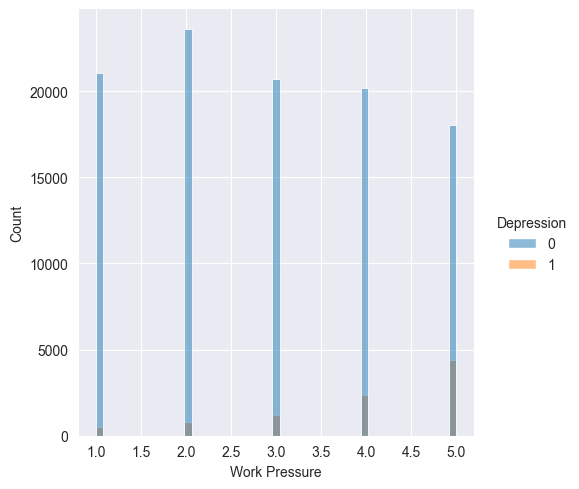

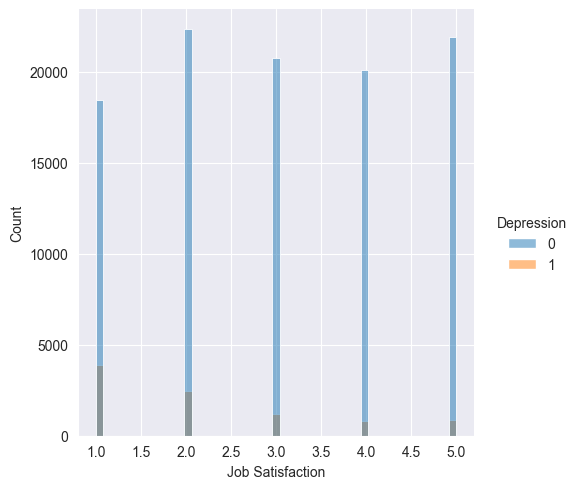

In [30]:
sns.displot(train, x="Work Pressure", hue='Depression')
sns.displot(train, x="Job Satisfaction", hue='Depression')

The same pattern reappear here for the **Working Professional** but the ratio of depressed persons is way lower than what we saw for **Student**

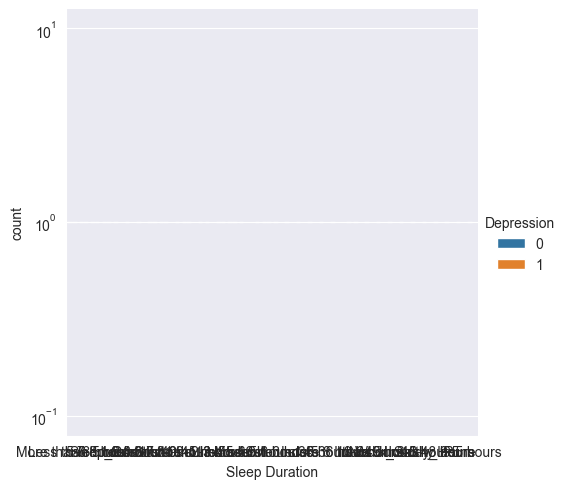

In [38]:
sns.catplot(train, x='Sleep Duration', kind='count', hue='Depression', log_scale=True)

<Axes: xlabel='Work/Study Hours', ylabel='Sleep Duration'>

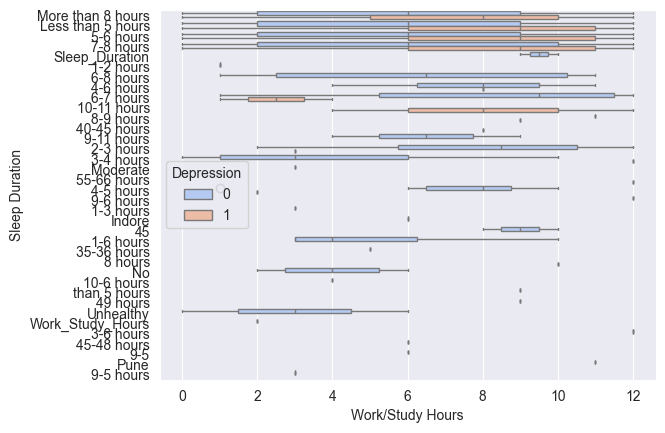

In [49]:
sns.boxplot(x="Work/Study Hours",
    y="Sleep Duration",
    hue="Depression",
    data=train,
    palette="coolwarm")

In [56]:
train["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 